In [51]:
import numpy as np
import matplotlib.pyplot as plt
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)


x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

theta_best

array([[4.1017337 ],
       [2.96791745]])

In [52]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[ 4.1017337 ],
       [10.03756859]])

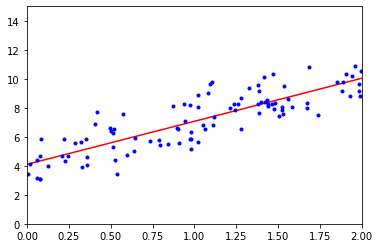

In [53]:
plt.plot(x_new, y_predict,"r-")
plt.plot(x,y,"b. ")
plt.axis([0,2,0,15])
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(x_new)



array([[ 4.1017337 ],
       [10.03756859]])

In [55]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.1017337 ],
       [2.96791745]])

In [56]:
np.linalg.pinv(x_b).dot(y)

array([[4.1017337 ],
       [2.96791745]])

In [57]:
eta=0.1
n_iterations = 1000
m=100

theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta - eta*gradients
theta

array([[4.1017337 ],
       [2.96791745]])

In [58]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)  # random initialization 
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1] 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients
theta

array([[4.06518337],
       [2.98473427]])

In [59]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) 
sgd_reg.fit(x, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.08957375]), array([2.94770994]))

In [60]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([0.74260787, 0.55146645])

In [61]:
lin_reg = LinearRegression() 
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.18174098]), array([[0.98131812, 0.48290347]]))

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m]) 
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) 
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

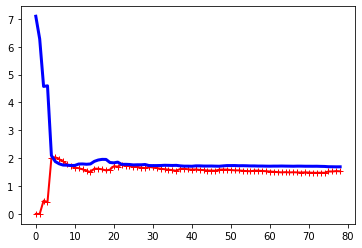

In [63]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

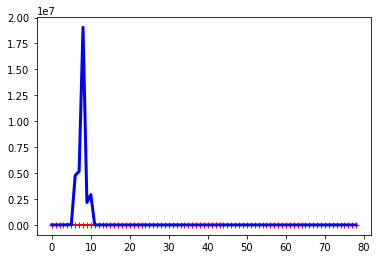

In [64]:
from sklearn.pipeline import Pipeline 
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
    ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(polynomial_regression, X, y)

In [65]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky") 
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.99773077]])

In [66]:
sgd_reg = SGDRegressor(penalty="l2") 
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]]) 


array([4.97732068])

In [67]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.9515648])

In [68]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.9535036])

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler, MinMaxScaler

poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train) 
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf") 
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict) 
    if val_error < minimum_val_error:
        minimum_val_error = val_error 
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [73]:
from sklearn import datasets 
iris = datasets.load_iris() 
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [74]:
X = iris["data"][:, 3:] 
y = (iris["target"] == 2).astype(np.int)

C:\Users\user\AppData\Local\Temp\ipykernel_10248\3818514581.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [75]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

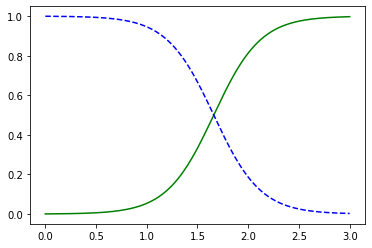

In [76]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) 
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [78]:
X = iris["data"][:, (2, 3)] # petal length, petal width 
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) 
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [79]:
softmax_reg.predict([[5, 2]])

array([2])

In [80]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [17]:
#Batch gradient descent with early stopping
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris=load_iris()
x=iris['data']
y=iris['target']

x_bias=np.c_[np.ones([len(x),1]),x]
np.random.seed(1000)

test=0.1
validate=0.1
total=len(x_bias)

testsize=int(total*test)
validatesize=int(total*validate)
trainsize=total-testsize-validatesize

x_train=x_bias[np.random.permutation(total)[:trainsize]]
y_train=y[np.random.permutation(total)[:trainsize]]
x_valid=x_bias[np.random.permutation(total)[trainsize:-testsize]]
y_valid=y[np.random.permutation(total)[trainsize:-testsize]]
x_test=x_bias[np.random.permutation(total)[-testsize:]]
y_test=y[np.random.permutation(total)[-testsize:]]

def trans(Y):
    nclasses=Y.max()+1
    m=len(Y)
    Y_trans=np.zeros((m,nclasses))
    Y_trans[np.arange(m),Y]=1
    return Y_trans
y_train_p=trans(y_train)
y_valid_p=trans(y_valid)
y_test_p=trans(y_test)

def softmax(Z):
    top=np.exp(Z)
    bottom=np.sum(top,axis=1,keepdims=True)
    return top/bottom

eta = 0.01
n_iterations = 1000
m = len(x_train)
epsilon = 0.000001

Theta = np.random.randn(x_train.shape[1], len(np.unique(y_train)))

for iteration in range(n_iterations):
    logits = x_train.dot(Theta)
    y_p = softmax(logits)
    error = y_p - y_train_p
    gradients = 1/m * x_train.T.dot(error)
    Theta = Theta - eta * gradients

print(Theta)

[[ 0.72397005  1.10883789 -0.80933533]
 [ 0.42194098 -0.14470447  0.95580396]
 [ 0.00564988  0.90218572 -0.01835409]
 [-0.2540424  -0.91040994 -1.14658772]
 [-1.99834921  0.11813314 -0.42973362]]


In [ ]:
'''why would you want to use

1. because model with regularization(ridge regression) perfrome better
2. lasso is better when few features are important
3. elastic net is better when several features are strongly correlated
'''


In [ ]:
#problem 2
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def data(variable, size):
    data=pd.DataFrame()
    for i in range(variable):
        


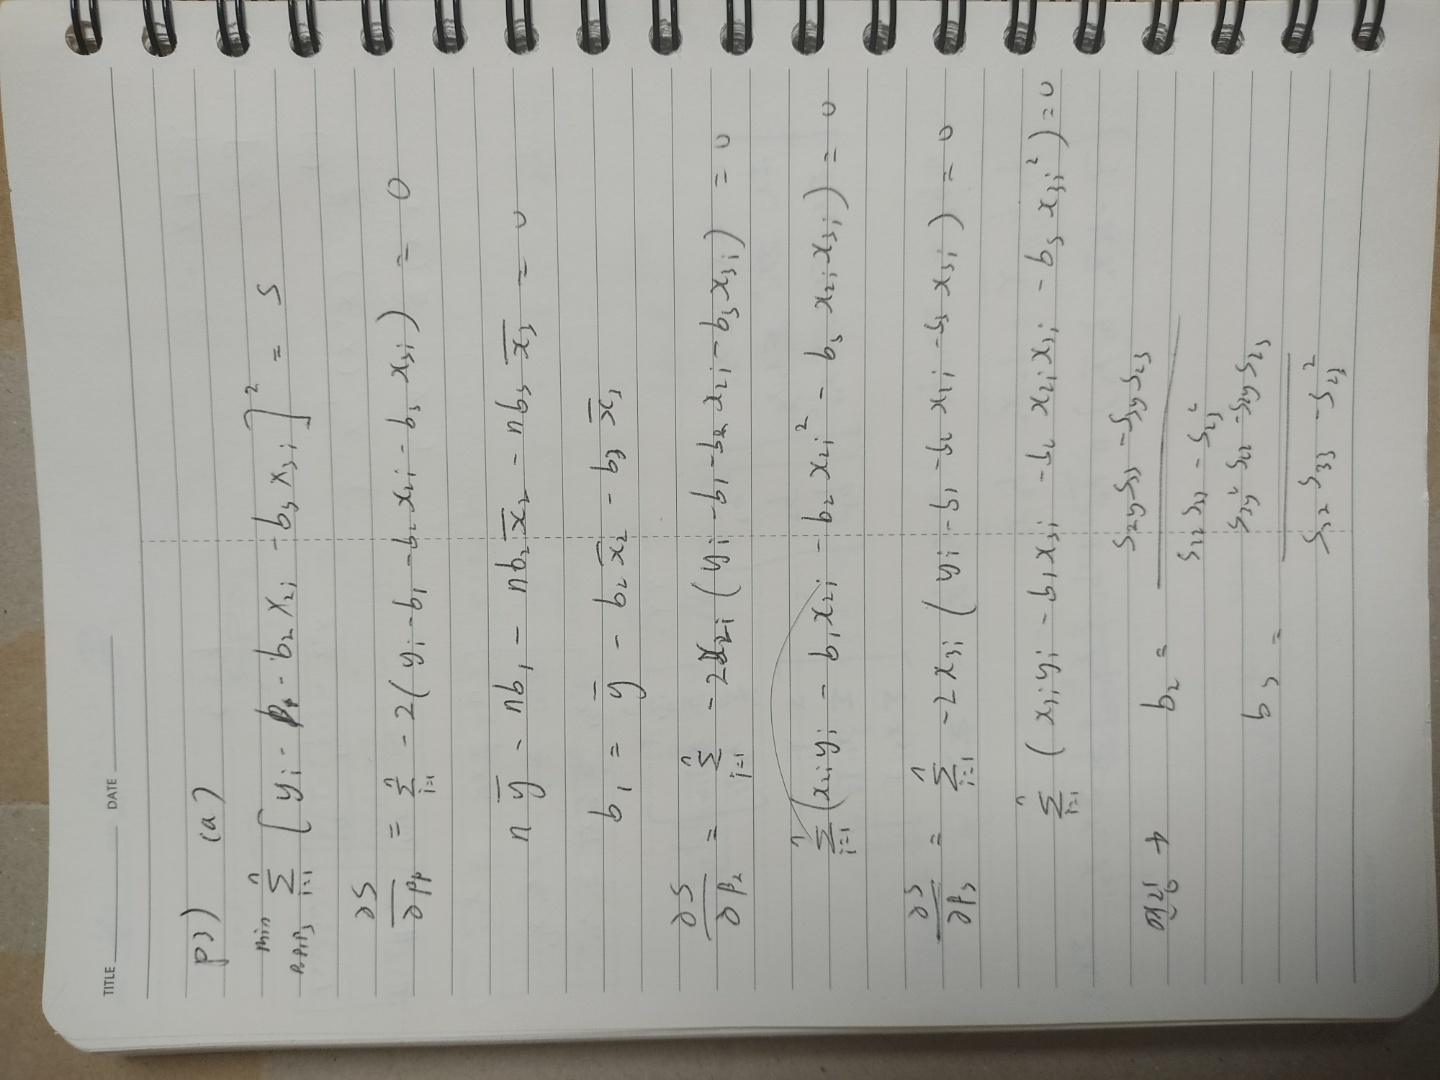

In [23]:
from IPython.display import Image
Image('C:/Users/user/Desktop/fba/fml/새 폴더 (2)/3(a).jpg')


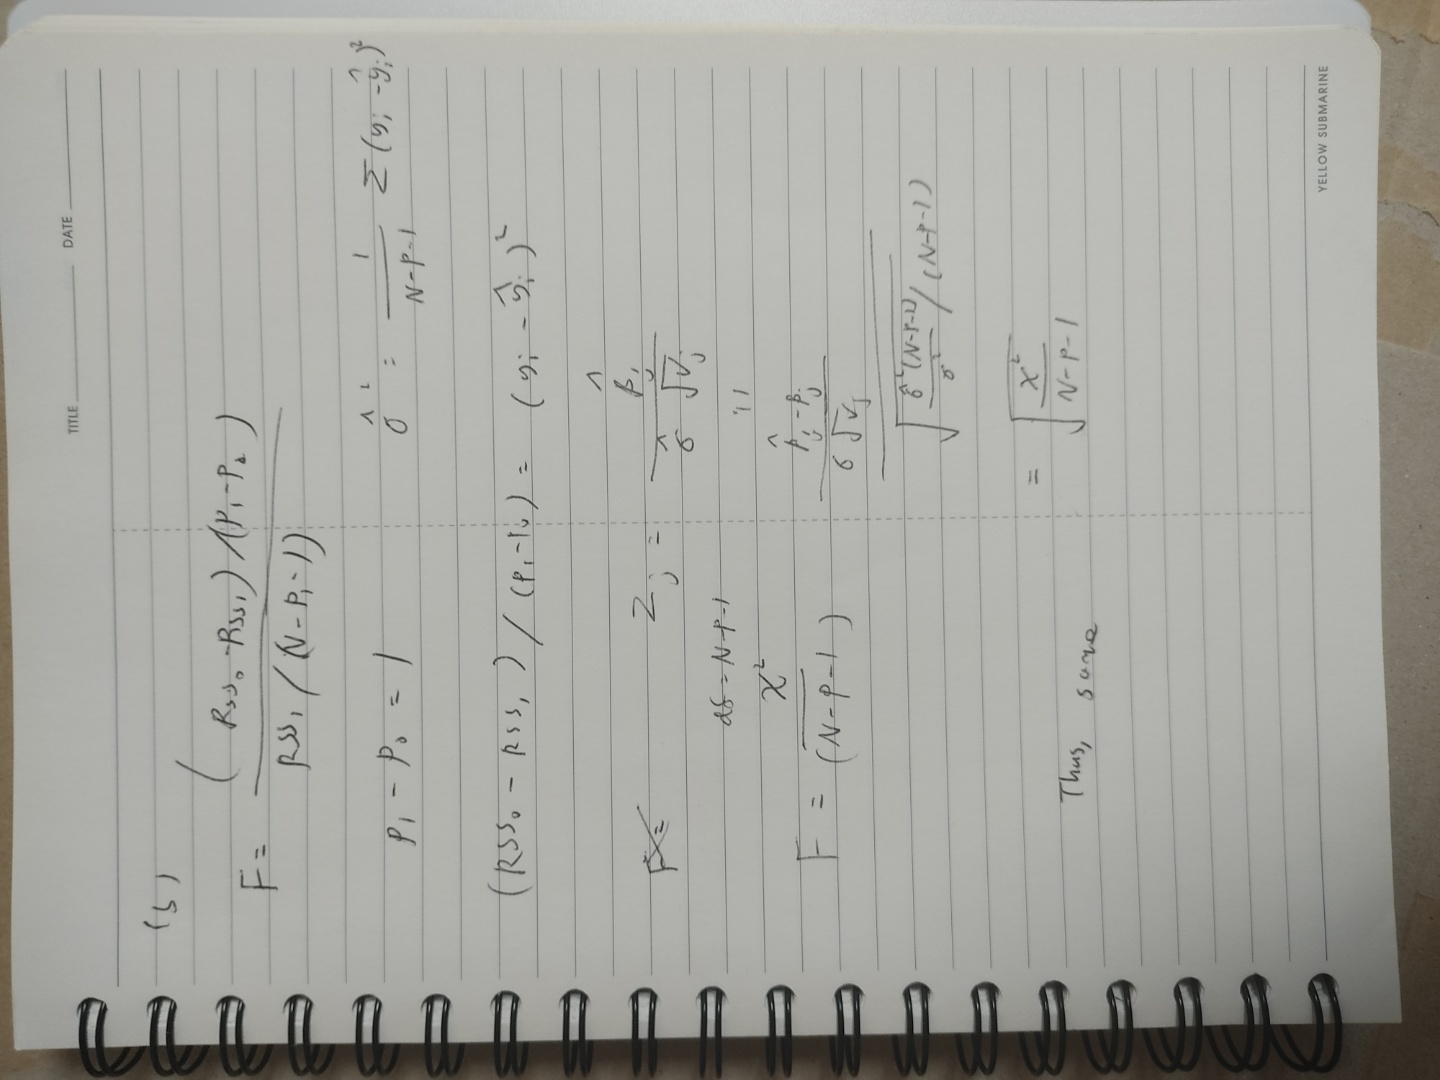

In [24]:
Image('C:/Users/user/Desktop/fba/fml/새 폴더 (2)/3(b).jpg')